In [12]:
from google.colab import drive
drive.mount('/content/gdrive')
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

# 전용 라이브러리
from skimage import data, segmentation, color, graph
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
img = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/peppers.jpg') # 영상 불러오기


In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [10]:
# SLIC 알고리즘 사용해 이미지 분할, 각 영역에 고유한 레이블을 할당함
# 각 픽셀의 레이블은 레이블 배열에 저장
labels1 = slic(img, n_segments=400, compactness=30, sigma=1, start_label=1)


In [15]:
# label2rgb 함수는 한 영역(동일 레이블)에 속하는 모든 픽셀에 특정 색상을 할당함
# 이. ㅕㅇ우 각. 픽셀은 해당 영역의 평균 rgb 색상으로 대체
labels1 = slic(img, n_segments=400, compactness=30, sigma=1, start_label=1)
out1=color.label2rgb(labels1, img, kind='avg')

# 동일 레이블 영역에 경계선 표시
label_rgb1 = mark_boundaries(out1, labels1)
# RAG 적용 (영역간 색상만으로 그래프 병합)
g = graph.rag_mean_color(img, labels1)
# 각 영역별 색상 가중치가 임계값(29) 이하이면 병합
labels2 = graph.cut_threshold(labels1, g, 29)
# RAG 이후 동일 레이블에 해당하는 픽셀들의 평균값으로 채워주기
out2 = color.label2rgb(labels2, img, kind='avg', bg_label=0)
# 동일 레이블 갖는 영역들에 경계선 표시
label_rgb2 = mark_boundaries(out2, labels2)

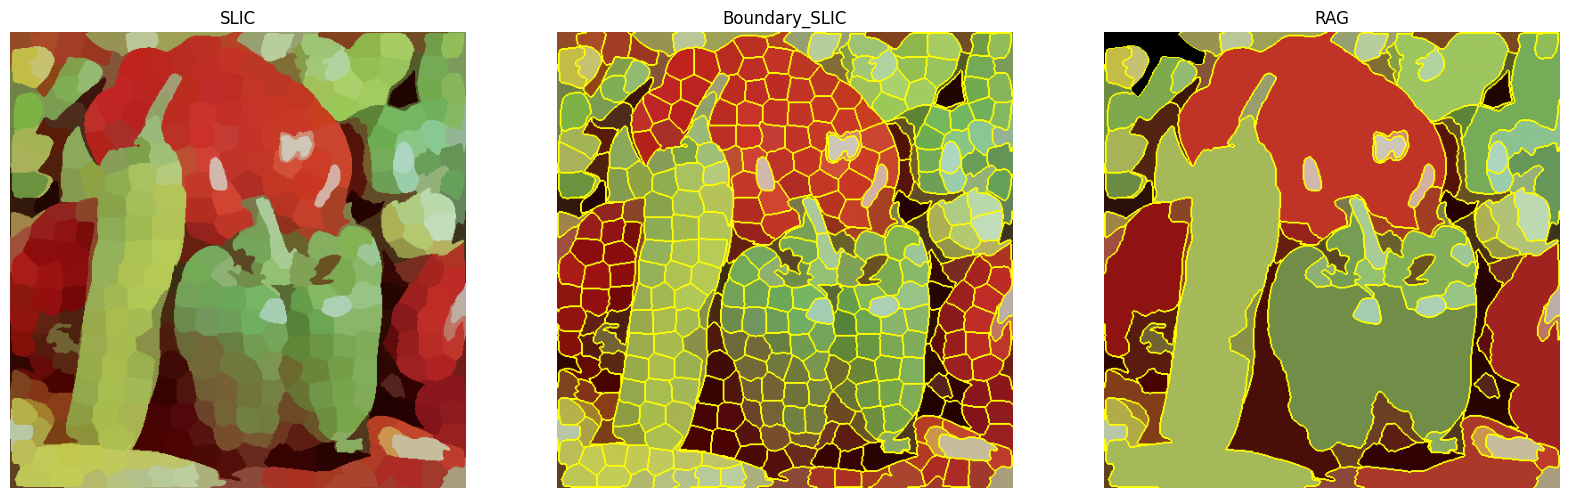

In [16]:
# 표출
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.title("SLIC")
plt.imshow(out1)
plt.axis("off")
plt.subplot(1,3,2)
plt.title("Boundary_SLIC")
plt.imshow(label_rgb1)
plt.axis("off")
plt.subplot(1,3,3)
plt.title("RAG")
plt.imshow(label_rgb2)
plt.axis("off")
plt.show()